In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_loc='EDA_large_data.csv'
visa_df=pd.read_csv(file_loc)
visa_df

,ID,Age,Gender,Income,Spend_Score,Region,Customer_Type,Purchase_Frequency,Savings,Credit_Score,Online_Shopping,Loyalty_Points
0,1,56,Male,49770.79,27,East,New,2,20697.08,620,No,1400
1,2,49,Female,57777.86,35,South,VIP,2,24308.49,822,No,3624
2,3,50,Female,57966.19,82,South,VIP,2,29561.40,652,Yes,9523
3,4,33,Female,59555.88,30,North,VIP,2,22868.76,503,No,244
4,5,29,Male,60871.07,14,East,New,3,31972.05,454,Yes,375
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24996,42,Male,47428.10,95,East,Returning,4,19250.61,429,No,3504
24996,24997,45,Male,73364.48,46,East,Returning,2,26113.03,555,No,148
24997,24998,60,Male,48966.95,41,South,VIP,1,5739.21,497,Yes,5832
24998,24999,30,Female,49105.76,85,South,Returning,4,9281.24,729,No,4737


In [2]:
visa_df.dtypes

ID                      int64
Age                     int64
Gender                 object
Income                float64
Spend_Score             int64
Region                 object
Customer_Type          object
Purchase_Frequency      int64
Savings               float64
Credit_Score            int64
Online_Shopping        object
Loyalty_Points          int64
dtype: object

In [3]:
visa_df['Region']

0         East
1        South
2        South
3        North
4         East
         ...  
24995     East
24996     East
24997    South
24998    South
24999    North
Name: Region, Length: 25000, dtype: object

In [4]:
type(visa_df['Region'])

pandas.core.series.Series

In [5]:
col=['Region']
visa_df[col]

,Region
0,East
1,South
2,South
3,North
4,East
...,...
24995,East
24996,East
24997,South
24998,South


In [6]:
visa_df['Region']           # Series
visa_df[['Region']]         # DataFrame

,Region
0,East
1,South
2,South
3,North
4,East
...,...
24995,East
24996,East
24997,South
24998,South


In [7]:
visa_df['Region'].values

array(['East', 'South', 'South', ..., 'South', 'South', 'North'],
      dtype=object)

In [8]:
visa_df[['Region']].values      # Dont use this

array([['East'],
       ['South'],
       ['South'],
       ...,
       ['South'],
       ['South'],
       ['North']], dtype=object)

In [9]:
l1=[1,2,3,4]
l2=[10,20,30,40]
l1+l2

[1, 2, 3, 4, 10, 20, 30, 40]

In [10]:
a1=np.array(l1)
a2=np.array(l2)
a1+a2

array([11, 22, 33, 44])

In [11]:
# Read multiple columns
# Region
# Spend_Score
cols=['Region','Spend_Score']
visa_df[cols].head()

,Region,Spend_Score
0,East,27
1,South,35
2,South,82
3,North,30
4,East,14


$unique$

In [13]:
visa_df['Region'].unique()
# There are almost 25k entries in Region column
# But some values repeated as 25k

array(['East', 'South', 'North', 'West'], dtype=object)

$nunique$

In [15]:
visa_df['Region'].nunique()

4

In [16]:
len(visa_df['Region'].unique())        # Same result as nunique

4

In [17]:
# How many North count is available out of 25k entries
# How many South count is available out of 25k entries
# How many East count is available out of 25k entries
# How many West count is available out of 25k entries

$Value-Counts$

In [19]:
visa_df['Region'].value_counts()

Region
East     6300
West     6258
North    6225
South    6217
Name: count, dtype: int64

In [20]:
visa_df['Region'].value_counts(normalize=True)

Region
East     0.25200
West     0.25032
North    0.24900
South    0.24868
Name: proportion, dtype: float64

In [21]:
type(visa_df['Region'].value_counts())

pandas.core.series.Series

In [22]:
df0=dict(visa_df['Region'].value_counts())
l01=list(df0.keys())
l02=list(df0.values())
df001=pd.DataFrame(zip(l01,l02),columns=['Region','Count'])
df001.to_csv('Region_df.csv',index=False)
df001

,Region,Count
0,East,6300
1,West,6258
2,North,6225
3,South,6217


In [23]:
df0=dict(visa_df['Region'].value_counts())
pd.DataFrame(df0,index=["Count"])

# ValueError: If using all scalar values, you must pass an index

# In the dictionary if values in the form of list: then no need to provide index
# In the dictionary if values are as single (Scalar): Then provide index

,East,West,North,South
Count,6300,6258,6225,6217


$Bar-Chart$

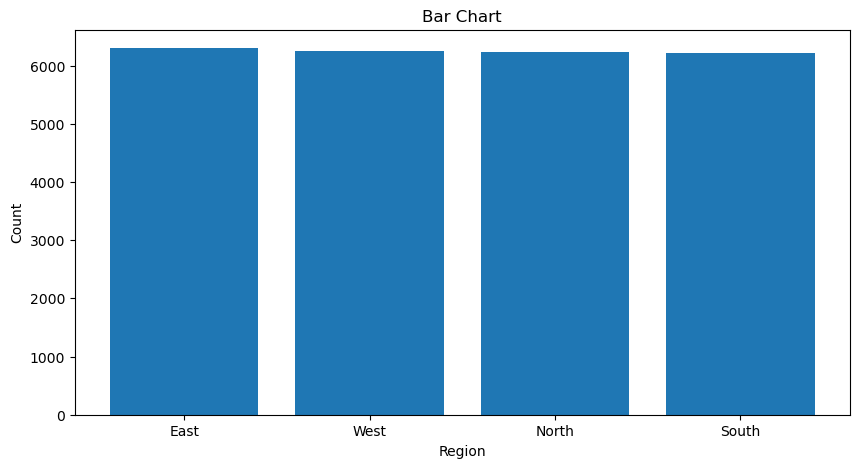

In [25]:
# Bar chart requires one categorical column, one numerical column
# Region df output consider as frequency table
# In that we have one cat column: Region (X-axis)
# Count is a numerical column: (Y-axis)

plt.figure(figsize=(10,5))
plt.bar('Region','Count',data=df001)
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Bar Chart")
plt.savefig("Region_bar_chart.jpg")
plt.show()

- We read Categorical Columns

- Unique

- nunique

- Value Counts

- From the value counts we created a dataframe (Frequency Table)

- Bar Chart

**Bar chart require two things**

- Under Matplotlib
    
- X-axis (Categorical column)
    
- Y-axis (Numerical column)
    

**Count plot**

- Under seaborn package
    
- It requires directly column name from original dataframe

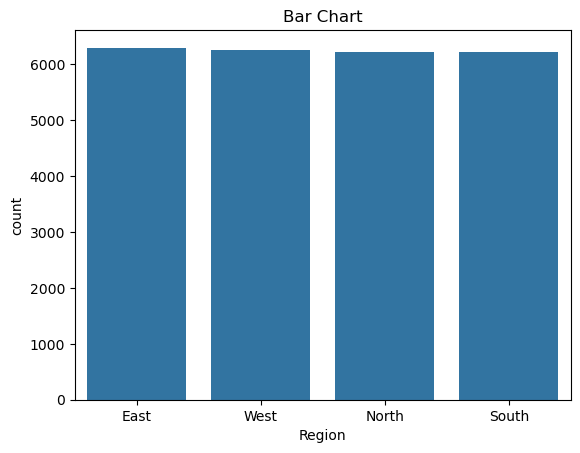

In [71]:
order_labels=['East','West','North','South']
sns.countplot(data=visa_df,x='Region',order=order_labels)
plt.title("Bar Chart")
plt.show()

In [61]:
visa_df["Region"].value_counts().keys()
visa_df["Region"].value_counts().to_list()

[6300, 6258, 6225, 6217]

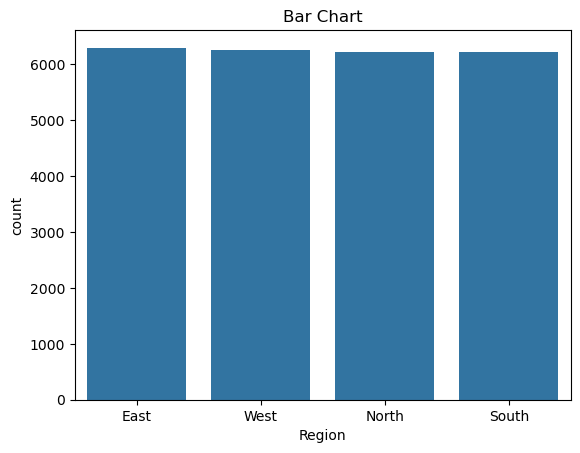

In [75]:
visa_df["Region"].value_counts()
# In the series
# We have left side : keys
# We have right side : values
keys=visa_df["Region"].value_counts().keys()             #=====  keys
values=visa_df["Region"].value_counts().to_list()          #=====  values  #not requied here
sns.countplot(data=visa_df,x='Region',order=keys)
plt.title("Bar Chart")
plt.show()

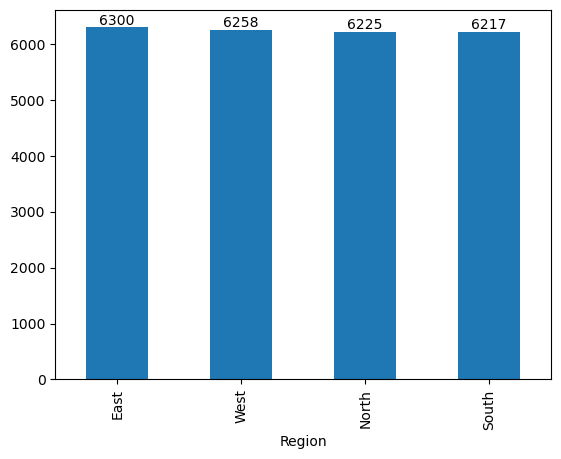

In [87]:
values=visa_df['Region'].value_counts()
ax=values.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

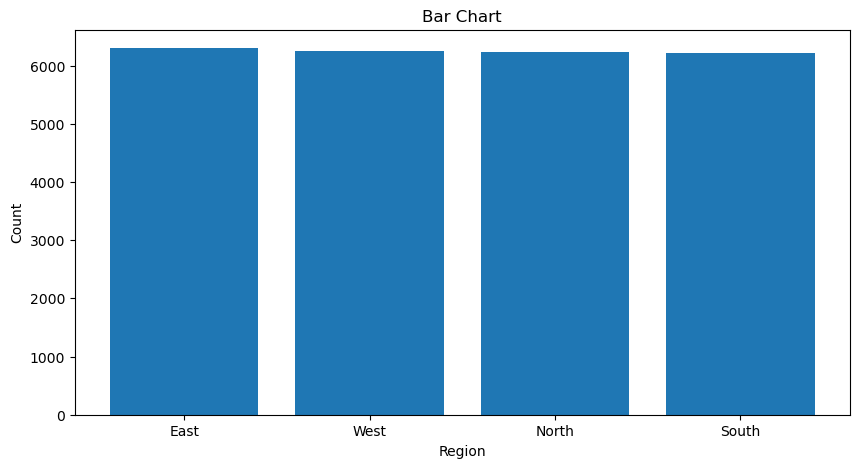

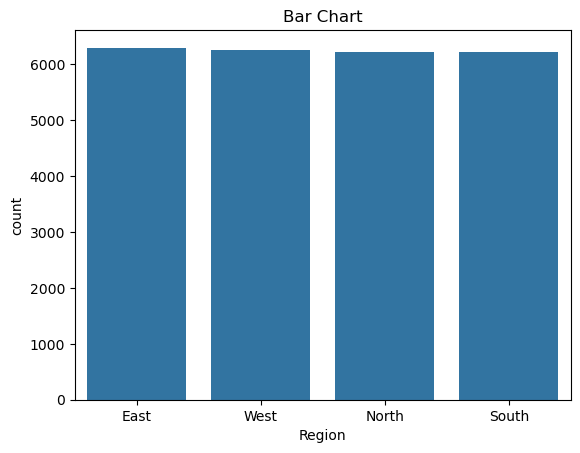

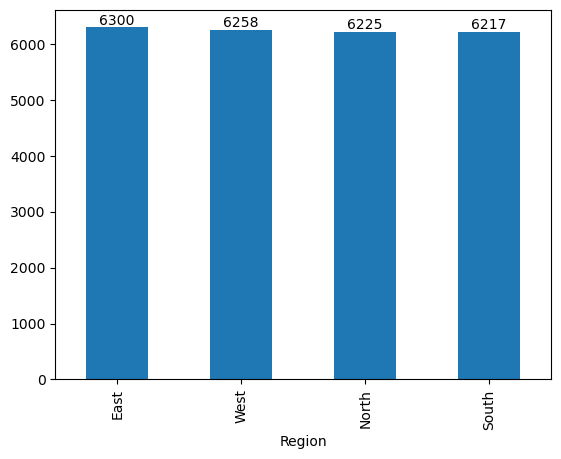

In [93]:
# Method 1   (Matplotlib)

plt.figure(figsize=(10,5))
plt.bar('Region','Count',data=df001)
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Bar Chart")
plt.savefig("Region_bar_chart.jpg")
plt.show()

# Method 2   (Seaborn count plot)

visa_df["Region"].value_counts()
keys=visa_df["Region"].value_counts().keys()
sns.countplot(data=visa_df,x='Region',order=keys)
plt.title("Bar Chart")
plt.show()

# Method 3   (Value counts plot)

values=visa_df['Region'].value_counts()
ax=values.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

$Pie-Chart$

In [97]:
values=visa_df['Region'].value_counts(normalize=True)
values

Region
East     0.25200
West     0.25032
North    0.24900
South    0.24868
Name: proportion, dtype: float64

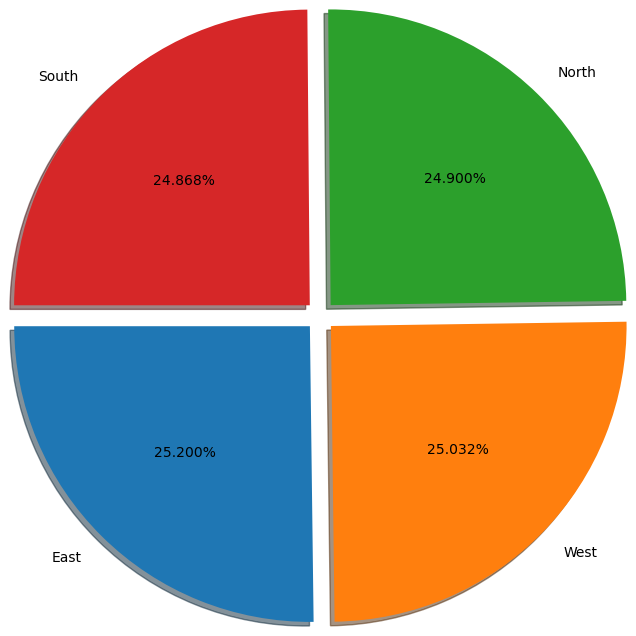

In [113]:
# x = values
# labels = keys
keys=visa_df['Region'].value_counts().keys()
values=visa_df['Region'].value_counts().to_list()
plt.pie(x=values,
        labels=keys,
        autopct="%0.3f%%",
        explode=[0.1,0.1,0.1,0.1],
       shadow=True,
       startangle=180,
       radius=2)
plt.show()